# Bankruptcy Prediction 

### Using Quantitative Bankruptcy data

Raja Sekar S (19381045) 

## Contents  
<ol>
    <b><li>Importing libraries</li></b>
    <li><b>Importing and organizing the data</b>
        <ol>
            <li>Data Information</li>
            <li>Rename Column</li>
            <li>Data Preparation</li>
        </ol>
    </li>
    <li><b>Data Analysis and Preprocessing</b>
        <ol>
            <li>Missing Data Analysis</li>
            <li>Imbalanced data</li>
            <li>EDA</li>               
        </ol>
    </li>
    <li><b>SMOTE Sampling</b>
    </li>               
    <li><b>Data Models</b>
        <ol>
                    <li>Logistic Regression classifier</li>
                    <li>Support Vector Machine</li>
                    <li>Gaussian Naive Bayes classifier</li>
                    <li>Decision Tree classifier</li>
                    <li>Random Forest classifier</li>
                    <li>Extreme Gradient Boosting classifier</li>
                    <li>Balanced Bagging classifier</li>            
         </ol>
    </li>
    <li><b>Model Analysis</b>
    </li>
    <li><b>Ensemble Blender</b>
    </li>
    <li><b>Summary</b>
    </li>
</ol>

## 1. Importing libraries

### Import Data Analysis Libraries

In [1]:
import pandas as pd
import numpy as np

### Import Visualization Libraries

In [2]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE  # Helps visualize higher dimensions data
import missingno as msno # Missing Data visualization
import seaborn as sns
sns.set(style="white")
%matplotlib inline

### Import Sklean (Machine learning framework in Python)

In [3]:
from sklearn.preprocessing import StandardScaler, normalize  # Helps us in Standardizing the data
from sklearn.metrics import f1_score, average_precision_score # Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

from sklearn.impute import SimpleImputer                                                                                                             # metrics
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.cluster import KMeans # Clustering
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE # Oversampling
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


In [4]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score

### Miscellaneous

In [5]:
import time
from datetime import datetime
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

## 2. Importing and organizing the data

Dataset generated using Altman Z Score Model

In [6]:
#Load CSV file
df = pd.read_csv('Qdata.csv')
df = df.apply (pd.to_numeric, errors='coerce')

# Printing out the first 5 rows of the dataframe
df.head()

,X1,X2,X3,X4,X5,Y
0,-3,-2.5,-1.5,-6.5,-4,1
1,-2,-2.5,-1.5,-6.5,-4,1
2,-1,-2.5,-1.5,-6.5,-4,1
3,0,-2.5,-1.5,-6.5,-4,1
4,1,-2.5,-1.5,-6.5,-4,1


### Data Information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216216 entries, 0 to 216215
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      216216 non-null  int64  
 1   X2      216216 non-null  float64
 2   X3      216216 non-null  float64
 3   X4      216216 non-null  float64
 4   X5      216216 non-null  int64  
 5   Y       216216 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 9.9 MB


In [8]:
df.describe()

,X1,X2,X3,X4,X5,Y
count,216216.000000,216216.000000,216216.000000,216216.000000,216216.000000,216216.000000
mean,2.500000,2.500000,1.000000,3.500000,2.000000,0.128996
std,3.452061,3.162285,1.707829,6.055315,3.741666,0.335196
min,-3.000000,-2.500000,-1.500000,-6.500000,-4.000000,0.000000
25%,-0.250000,-0.500000,-0.500000,-1.500000,-1.000000,0.000000
50%,2.500000,2.500000,1.000000,3.500000,2.000000,0.000000
75%,5.250000,5.500000,2.500000,8.500000,5.000000,0.000000
max,8.000000,7.500000,3.500000,13.500000,8.000000,1.000000


In [9]:
print(df['Y'].value_counts())

0    188325
1     27891
Name: Y, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


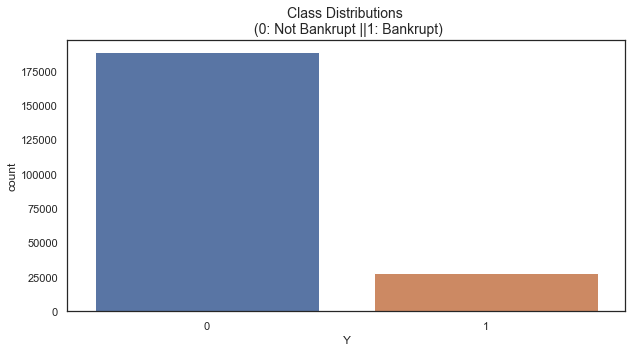

In [10]:
# Checking labels distributions
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
sns.countplot(df['Y'])
plt.title('Class Distributions \n (0: Not Bankrupt ||1: Bankrupt)', fontsize=14)
plt.show()

## 3. Data Analysis and Preprocessing

### 3.A Missing Data Analysis
Surely, there is missing data. Let us now see how much of it is missing

In [11]:
# detect the missing values
df.isna()
count = df.isna().sum()
count

X1    0
X2    0
X3    0
X4    0
X5    0
Y     0
dtype: int64

The above step shows us that there are no missing data. 

### ---------------------------------------------------------------------------------------------------------------------------------------------------------

### 3.B Imbalanced data   

We have not dealt with the class imbalance (if any) in the data. Simply put, Data Imbalance is a condition where the samples belonging to one or more 'majority' class labels of a labelled dataset heavily outnumber the sample belonging to the other 'minority' classes.   

Data imbalance critically affects the modeling as the models won't have sufficient data belonging to minority classes to train on and this leads to biased models, ultimately leading to poor performance on test data.   

Firstly, let us see if our data is imbalanced, and to what extent.

In [12]:
print('Quantitative Bankruptcy Data')
print(df.groupby('Y').size())
minority_percent = (df['Y'].tolist().count(1) / len(df['Y'].tolist()))*100
print('(label 1) percentage: '+  str(minority_percent) + '%')
        

Quantitative Bankruptcy Data
Y
0    188325
1     27891
dtype: int64
(label 1) percentage: 12.8996003996004%


We have seen in the step above that there is a lot of data imbalance for our datasets, as indicated by the percentage of minority class (label `1`) samples among their datasets. 

### 3.C Exploratory Data Analysis (EDA)

Let's explore our dataset to gain as much information as possible from several types of visualizations. A first general plot to show is the correlation heatmap that plots all the correlations (linear and non, depending on the the selected test: Pearson or Spearman) among numerical variables of the dataset. Knowing the correlations among features is an important step in deciding which features to maintain during training.

In [13]:
print (df['Y'].value_counts())

0    188325
1     27891
Name: Y, dtype: int64


### Pearson Correlation Matrix

In [14]:
def pearson_corr(size_x,size_y,dataframe,correlation_target,correlation_minimum_criteria):

    # Using Pearson Correlation

    plt.figure(figsize=(size_x,size_y))
    cor = dataframe.corr(method="pearson")
    sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
    plt.show()

    # Correlation with output variable

    target = abs(cor[correlation_target])

    #Selecting and printing highly correlated features

    relevant_features = target[target>correlation_minimum_criteria]
    print(relevant_features)

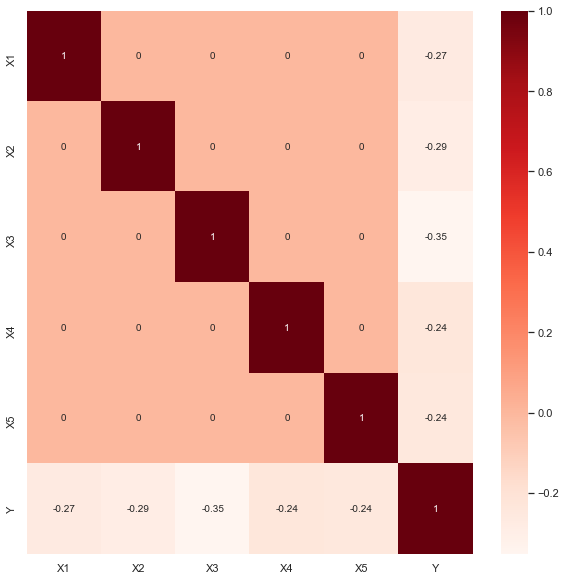

X1    0.267251
X2    0.285093
X3    0.352784
X4    0.235009
X5    0.241906
Y     1.000000
Name: Y, dtype: float64


In [15]:
pearson_corr(10,10,df,'Y',0.2)

### Spearman Correlation

In [16]:
def spearman_corr(size_x,size_y,dataframe,correlation_target,correlation_minimum_criteria):

    # Using Pearson Correlation

    plt.figure(figsize=(size_x,size_y))
    cor = dataframe.corr(method="spearman")
    sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
    plt.show()

    # Correlation with output variable

    target = abs(cor[correlation_target])

    #Selecting and printing highly correlated features

    relevant_features = target[target>correlation_minimum_criteria]
    print(relevant_features)

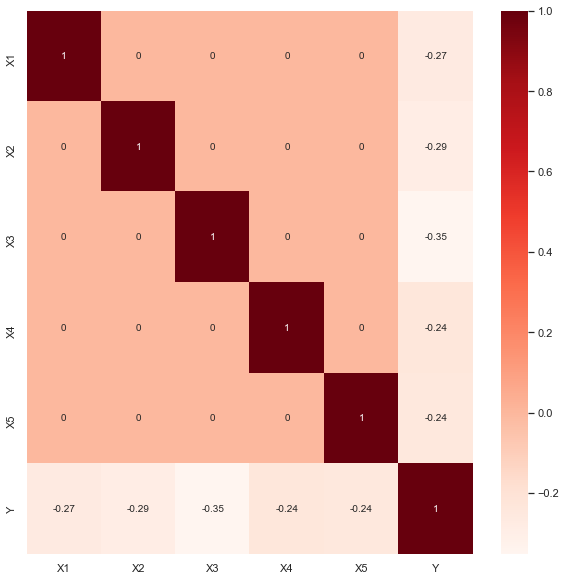

X3    0.352784
Y     1.000000
Name: Y, dtype: float64


In [17]:
spearman_corr(10,10,df,'Y',0.3)

Based on the Pearson correlation's matrix and Spearman correlation's matrix , we see that  
X3 = Financial Flexibility, 
X4 = Credibility 
X5 = Competitiveness 
have the highest correlation with the Y.

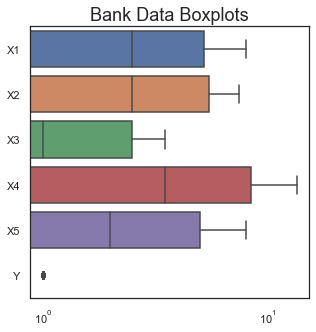

In [18]:
# Plotting Boxplots of the numerical features

plt.figure(figsize = (5,5))
ax =sns.boxplot(data = df, orient="h")
ax.set_title('Bank Data Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

Now, let's look at the distribution of these features for companies that are close to bankruptcy:

## 4. SMOTE Sampling

### Splitting

In [19]:
X_df = df.drop('Y', axis = 1)
Y_df = df['Y']

In [20]:
X = X_df.values
Y = Y_df.values

print (X.shape)
print (Y.shape)

(216216, 5)
(216216,)


In [21]:
x_res, x_test, y_res, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

### Resampling of data using SMOTE Technique
As we saw earlier this is a high imbalance data. By doing some oversampling we can add new rows to our data with target as minority class (In this case 1)

Data Imbalances happen for a reason. The reason - <b> rare occuring events </b>. Some events have rare occurences but when they do they have huge impact.
Something like cancer, meteor falling on Earth and killing Dinosaurs or Mortgage backed Security crisis of 2008, or something like Bankruptcy. So one has to take care of using an optimal ratio of while smoting. One shouldnot use a high ratio as these occurences are rare. 

In [22]:
# Lets check the imbalance first
print ('The Imbalance is: {}'.format(np.unique(y_res, return_counts=True)[1][1] / 
                                    (float(np.unique(y_res, return_counts=True)[1][0]) + 
                                    np.unique(y_res, return_counts=True)[1][1])*100))

The Imbalance is: 12.898494228647317


In [23]:
sm = SMOTE(random_state=42) # lets reduce the imbalance 

x_train_res,y_train_res = sm.fit_resample(x_res,y_res)

In [24]:
# Lets check the imbalance first
print ('The Imbalance is reduced now and stands at: {}'.format(np.unique(y_train_res, return_counts=True)[1][1] / 
                                    (float(np.unique(y_train_res, return_counts=True)[1][0]) + 
                                    np.unique(y_train_res, return_counts=True)[1][1])*100))

The Imbalance is reduced now and stands at: 50.0


##### But, Smote samples providing more error than normal dataset.
So,avoided Smote samples.

## 5. Data Models

### 5.A LOGISTIC REGRESSION 

In [25]:
logit = LogisticRegression()

In [26]:
# Splitting Train and Test Data
from sklearn.model_selection import train_test_split

y = df['Y']

# Dropping 

x = df.drop(['Y'], axis = 1)

# Splitting the data into training and testing data

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

### Metric Results

In [27]:
def resultmodel(model,x_test,y_test):

    # Use the model on the testing data to predict the results
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("Validation Result :")
    
    # Print the R2 score 
    print("Accuracy Score : ",accuracy_score(y_test,y_pred))
    print("Classification Report :")
    print(classification_report(y_test,y_pred))
    # Print the R2 score 

    print ("R2 score:\n") 
    print (('{:.2f}'.format((100*(r2_score(y_test, y_pred))))) + " %")

    print ("\n")

    # Print the mean squared error

    print ("Mean-squared error:\n")
    print(mean_squared_error(y_test, y_pred))
    
    #ROC
    print("ROC Curve:")
    model_roc_auc = roc_auc_score(y_test, model.predict(x_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print("Confusion Matrix:")
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

Validation Result :
Accuracy Score :  1.0
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56496
           1       1.00      1.00      1.00      8369

    accuracy                           1.00     64865
   macro avg       1.00      1.00      1.00     64865
weighted avg       1.00      1.00      1.00     64865

R2 score:

100.00 %


Mean-squared error:

0.0
ROC Curve:


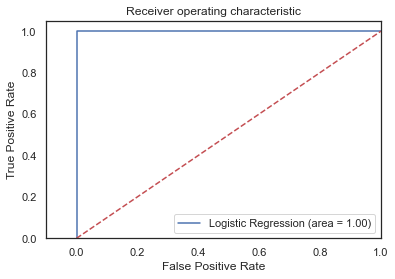

Confusion Matrix:


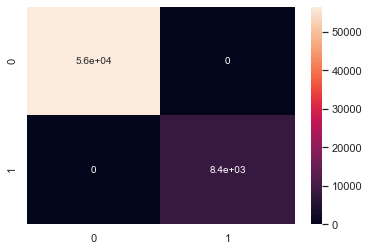

In [28]:
resultmodel(logit,x_test,y_test)

In [29]:
logit.fit(x_train, y_train)
y_pred = logit.predict(x_test)

In [30]:
print(np.unique(y_pred))

[0 1]


In [31]:
logit.predict([[-0.19,-0.1082,-0.1732,0.1759,0.2563]])

array([1], dtype=int64)

### 5.B Support Vector Machine

In [33]:
from sklearn.svm import SVC

In [34]:
model = SVC()
from sklearn.metrics import roc_curve, auc
def result_model(model,x_test,y_test):

    # Use the model on the testing data to predict the results
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("Validation Result :")
    
    # Print the R2 score 
    print("Accuracy Score : ",accuracy_score(y_test,y_pred))
    print("Classification Report :")
    print(classification_report(y_test,y_pred))
    # Print the R2 score 

    print ("R2 score:\n") 
    print (('{:.2f}'.format((100*(r2_score(y_test, y_pred))))) + " %")

    print ("\n")

    # Print the mean squared error

    print ("Mean-squared error:\n")
    print(mean_squared_error(y_test, y_pred))
    
    #ROC
    
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_pred)

    plt.grid()

    plt.plot(test_fpr, test_tpr, label=" AUC ="+str(auc(test_fpr, test_tpr)))
    plt.plot([0,1],[0,1],'g--')
    plt.legend()
    plt.xlabel("True Positive Rate")
    plt.ylabel("False Positive Rate")
    plt.title("AUC(ROC curve)")
    plt.grid(color='black', linestyle='-', linewidth=0.5)
    plt.show()
    print("Confusion Matrix:")
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

### Metrices

Validation Result :
Accuracy Score :  0.9984429199105835
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56496
           1       1.00      0.99      0.99      8369

    accuracy                           1.00     64865
   macro avg       1.00      1.00      1.00     64865
weighted avg       1.00      1.00      1.00     64865

R2 score:

98.61 %


Mean-squared error:

0.0015570800894164805


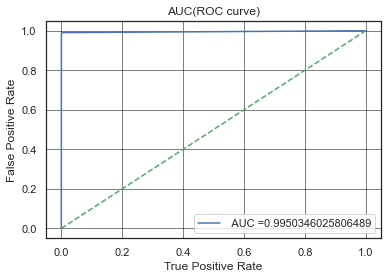

Confusion Matrix:


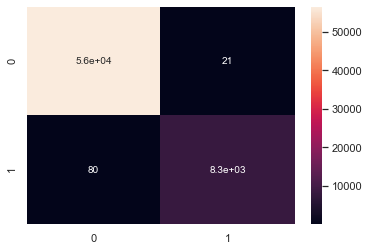

In [35]:
result_model(model,x_test,y_test)

### 5.C Naive Bayes Classifier

In [36]:
# Splitting Train and Test Data
from sklearn.model_selection import train_test_split

y = df['Y']

# Dropping 

x = df.drop(['Y'], axis = 1)

# Splitting the data into training and testing data

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [37]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

### Metrices

Validation Result :
Accuracy Score :  0.9391659600709166
Classification Report :
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     56496
           1       1.00      0.53      0.69      8369

    accuracy                           0.94     64865
   macro avg       0.97      0.76      0.83     64865
weighted avg       0.94      0.94      0.93     64865

R2 score:

45.87 %


Mean-squared error:

0.06083403992908348


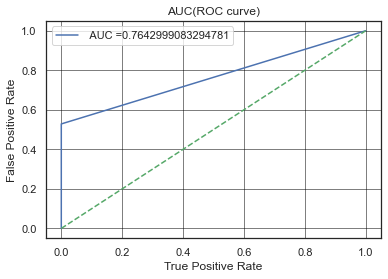

Confusion Matrix:


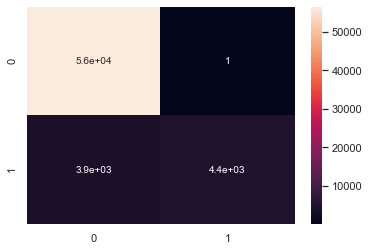

In [38]:
result_model(gnb,x_test,y_test)

In [39]:
from sklearn.metrics import roc_curve, auc
def result_model(model,x_test,y_test):

    # Use the model on the testing data to predict the results
    model.fit(x_train_res, y_train_res)
    y_pred = model.predict(x_test)
    print("Validation Result :")
    
    # Print the R2 score 
    print("Accuracy Score : ",accuracy_score(y_test,y_pred))
    print("Classification Report :")
    print(classification_report(y_test,y_pred))
    # Print the R2 score 

    print ("R2 score:\n") 
    print (('{:.2f}'.format((100*(r2_score(y_test, y_pred))))) + " %")

    print ("\n")

    # Print the mean squared error

    print ("Mean-squared error:\n")
    print(mean_squared_error(y_test, y_pred))
    
    #ROC
    
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_pred)

    plt.grid()

    plt.plot(test_fpr, test_tpr, label=" AUC ="+str(auc(test_fpr, test_tpr)))
    plt.plot([0,1],[0,1],'g--')
    plt.legend()
    plt.xlabel("True Positive Rate")
    plt.ylabel("False Positive Rate")
    plt.title("AUC(ROC curve)")
    plt.grid(color='black', linestyle='-', linewidth=0.5)
    plt.show()
    print("Confusion Matrix:")
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

Validation Result :
Accuracy Score :  0.9056501965620904
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.90      0.94     56496
           1       0.58      0.97      0.73      8369

    accuracy                           0.91     64865
   macro avg       0.79      0.93      0.83     64865
weighted avg       0.94      0.91      0.92     64865

R2 score:

16.04 %


Mean-squared error:

0.09434980343790951


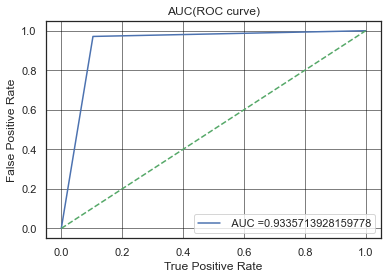

Confusion Matrix:


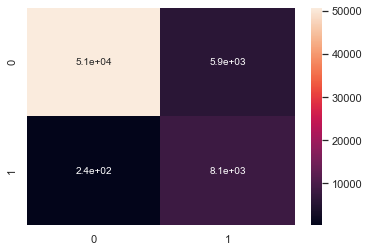

In [40]:
result_model(gnb,x_test,y_test)

### 5.D. Decision Tree Classifier using Stratified Sampling

In [41]:
# Splitting Train and Test Data
from sklearn.model_selection import train_test_split

y = df['Y']

# Dropping 

x = df.drop(['Y'], axis = 1)

# Splitting the data into training and testing data

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)


In [42]:

# Create Decision Tree classifer object
dtc = DecisionTreeClassifier(criterion="gini",splitter="best" ,max_depth=3)


### Metrices

Validation Result :
Accuracy Score :  0.702751869266939
Classification Report :
              precision    recall  f1-score   support

           0       0.99      0.67      0.80     56496
           1       0.29      0.94      0.45      8369

    accuracy                           0.70     64865
   macro avg       0.64      0.80      0.62     64865
weighted avg       0.90      0.70      0.75     64865

R2 score:

-164.51 %


Mean-squared error:

0.297248130733061


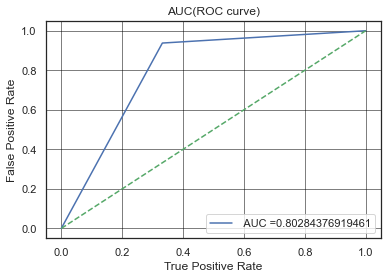

Confusion Matrix:


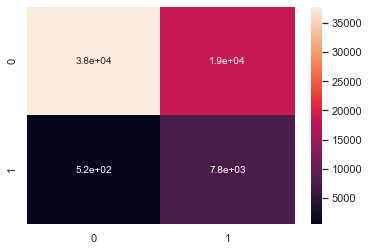

In [43]:
result_model(dtc,x_test,y_test)

### Decision Tree Visualization

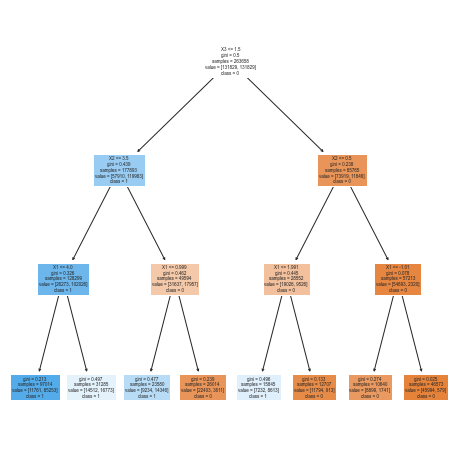

In [44]:
from sklearn import tree
feature_cols=['X1','X2','X3','X4','X5']
fig = plt.figure(figsize=(8,8))
_ = tree.plot_tree(dtc, 
                   feature_names=feature_cols,  
                   class_names=['0','1'],
                   filled=True)
fig.savefig("decistion_tree_s.png")

### 5.E Random Forest

In [45]:
# Splitting Train and Test Data
from sklearn.model_selection import train_test_split

y = df['Y']

# Dropping 

x = df.drop(['Y'], axis = 1)

# Splitting the data into training and testing data

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [46]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rf=RandomForestClassifier(n_estimators=100)


### Metrices

Validation Result :
Accuracy Score :  0.984197949587605
Classification Report :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     56496
           1       0.93      0.95      0.94      8369

    accuracy                           0.98     64865
   macro avg       0.96      0.97      0.97     64865
weighted avg       0.98      0.98      0.98     64865

R2 score:

85.94 %


Mean-squared error:

0.015802050412394974


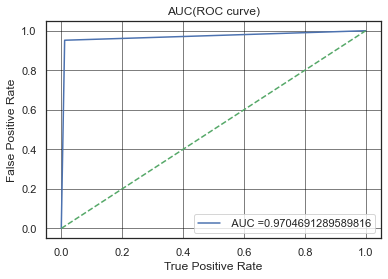

Confusion Matrix:


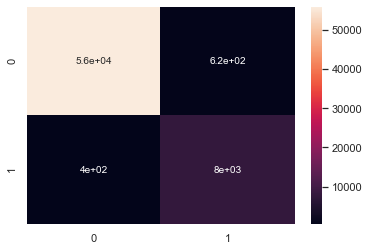

In [47]:
result_model(rf,x_test,y_test)

### 5.F Extreme Gradient Boosting classifier

In [32]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from xgboost import plot_tree

In [33]:
# Splitting Train and Test Data
from sklearn.model_selection import train_test_split

y = df['Y']

# Dropping 

x = df.drop(['Y'], axis = 1)

# Splitting the data into training and testing data

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [34]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.3,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [35]:
xg_reg.fit(x_train,y_train)

xb_pred = xg_reg.predict(x_test)

[11:10:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Raja Sekar\AppData\Roaming\Python\Python38\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [36]:
rmse = np.sqrt(mean_squared_error(y_test, xb_pred))
print("RMSE: %f" % (rmse))

RMSE: 0.287666


In [37]:
predictions = [round(value) for value in xb_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 87.15%


In [38]:
def resultmodel(model,x_test,y_test):

    # Use the model on the testing data to predict the results

    pred = model.predict(x_test)

    # Print the R2 score 

    print ("R2 score:\n") 
    print (('{:.2f}'.format((100*(r2_score(y_test, pred))))) + " %")

    print ("\n")

    # Print the mean squared error

    print ("Mean-squared error:\n")
    print(mean_squared_error(y_test, pred))
    


resultmodel(xg_reg,x_test,y_test)

R2 score:

26.36 %


Mean-squared error:

0.08275174647696389


C:\Users\Raja Sekar\AppData\Roaming\Python\Python38\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


### Report

In [39]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93     56496
           1       1.00      0.00      0.01      8369

    accuracy                           0.87     64865
   macro avg       0.94      0.50      0.47     64865
weighted avg       0.89      0.87      0.81     64865



### ROC Curve

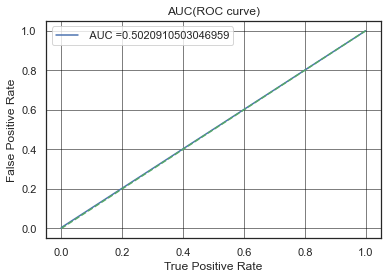

In [40]:
from sklearn.metrics import roc_curve, auc
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, predictions)

plt.grid()

plt.plot(test_fpr, test_tpr, label=" AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

### Confusion Matrix

<AxesSubplot:>

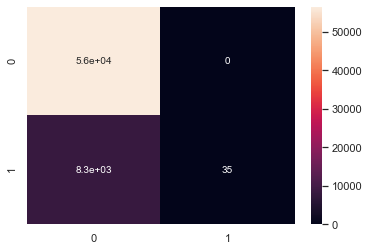

In [41]:

sns.heatmap(confusion_matrix(y_test,predictions,), annot=True)

#### Visualize Feature Importance

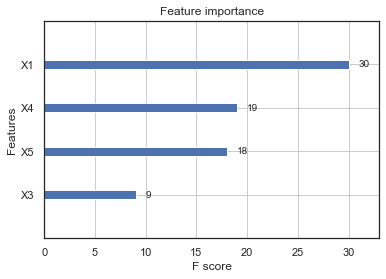

In [42]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

### 5.G Bagging Classifier

In [43]:
from sklearn.ensemble import BaggingClassifier

In [44]:
# Splitting Train and Test Data
from sklearn.model_selection import train_test_split

y = df['Y']

# Dropping 

x = df.drop(['Y'], axis = 1)

# Splitting the data into training and testing data

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [45]:
bag_model=BaggingClassifier(base_estimator=dtc, n_estimators=100, bootstrap=True)
bag_model=bag_model.fit(x_train,y_train)
bag_pred=bag_model.predict(x_test)

In [46]:
print(bag_model.score(x_test, y_test))


0.9324905573113389


In [47]:
def resultmodel(model,x_test,y_test):

    # Use the model on the testing data to predict the results

    pred = model.predict(x_test)

    # Print the R2 score 

    print ("R2 score:\n") 
    print (('{:.2f}'.format((100*(r2_score(y_test, pred))))) + " %")

    print ("\n")

    # Print the mean squared error

    print ("Mean-squared error:\n")
    print(mean_squared_error(y_test, pred))
    


resultmodel(bag_model,x_test,y_test)

R2 score:

39.92 %


Mean-squared error:

0.06750944268866106


### Report

In [48]:
print(classification_report(y_test, bag_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     56496
           1       0.81      0.62      0.70      8369

    accuracy                           0.93     64865
   macro avg       0.88      0.80      0.83     64865
weighted avg       0.93      0.93      0.93     64865



### ROC Curve

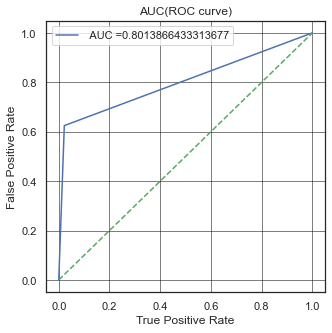

In [49]:
from sklearn.metrics import roc_curve, auc
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, bag_pred)

plt.grid()

plt.plot(test_fpr, test_tpr, label=" AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

### Confusion Matrix

<AxesSubplot:>

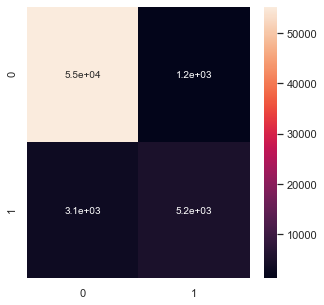

In [50]:

sns.heatmap(confusion_matrix(y_test,bag_pred,), annot=True)

#### Checking accuracy by changing base estimator

In [51]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression();
bnb = BernoulliNB()
gnb = GaussianNB()

Accuracy is 100.0%


<AxesSubplot:>

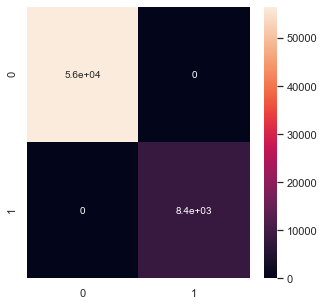

In [52]:
#LR
bag_model=BaggingClassifier(base_estimator=lr,n_estimators=100,bootstrap=True)
bag_model=bag_model.fit(x_train,y_train)
bag_pred1=bag_model.predict(x_test)
scoree=bag_model.score(x_test, y_test)
print("Accuracy is "+ str(scoree*100) + "%" )
sns.heatmap(confusion_matrix(y_test,bag_pred1,), annot=True)
 

From this, we can see that Logistic regression are the best base for Bagging. 
For Regression Base, Bagging made 100% Accuracy


## 6. Model Analysis

In [29]:
logit = LogisticRegression(random_state= 42)
svc = SVC(random_state= 42)
gnb = GaussianNB()
dtc = DecisionTreeClassifier(criterion="gini",splitter="best" ,max_depth=5)
rf = RandomForestClassifier(random_state= 42)


In [30]:
logit.fit(x_train,y_train)
svc.fit(x_train,y_train)
svc_predict = svc.predict(x_test)
gnb.fit(x_train,y_train)
nb_pred = gnb.predict(x_test)
dtc.fit(x_train,y_train)
dt_pred = dtc.predict(x_test)
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
    

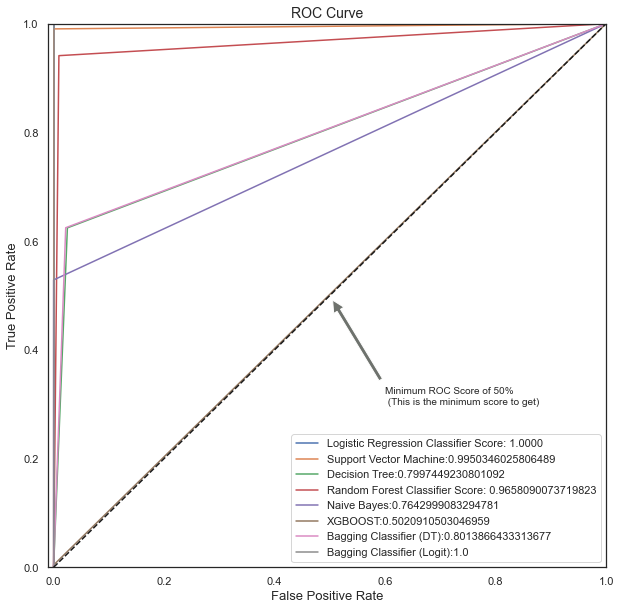

In [53]:
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logit.predict(x_test))
log_fpr, log_tpr, thresholds = roc_curve(y_test, logit.predict_proba(x_test)[:,1])
svc_fpr, svc_tpr, te_thresholds = roc_curve(y_test, svc_predict)
nb_fpr, nb_tpr, te_thresholds = roc_curve(y_test, nb_pred)
dt_fpr, dt_tpr, te_thresholds = roc_curve(y_test, dt_pred)
rf_fpr, rf_tpr, te_thresholds = roc_curve(y_test, rf_pred)
xgb_fpr, xgb_tpr, te_thresholds = roc_curve(y_test, predictions)
bag_fpr, bag_tpr, te_thresholds = roc_curve(y_test, bag_pred)
bag1_fpr, bag1_tpr, te_thresholds = roc_curve(y_test, bag_pred1)

def graph_roc_curve_multiple(log_fpr, log_tpr,svc_fpr, svc_tpr,dt_fpr, dt_tpr, rf_fpr, rf_tpr, nb_fpr, nb_tpr, xgb_fpr, xgb_tpr,bag_fpr, bag_tpr,bag1_fpr, bag1_tpr):
    plt.figure(figsize=(10,10))
    plt.title('ROC Curve', fontsize=14)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, logit.predict(x_test))))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Machine:'+str(auc(svc_fpr,svc_tpr))) 
    plt.plot(dt_fpr, dt_tpr, label='Decision Tree:'+str(auc(dt_fpr,dt_tpr)) )
    plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier Score: '+str(auc(rf_fpr,rf_tpr)))
    plt.plot(nb_fpr, nb_tpr, label='Naive Bayes:'+str(auc(nb_fpr,nb_tpr)))
    plt.plot(xgb_fpr, xgb_tpr, label='XGBOOST:'+str(auc(xgb_fpr,xgb_tpr)))
    plt.plot(bag_fpr, bag_tpr, label='Bagging Classifier (DT):'+str(auc(bag_fpr,bag_tpr)))
    plt.plot(bag1_fpr, bag1_tpr, label='Bagging Classifier (Logit):'+str(auc(bag1_fpr,bag1_tpr)))
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=13)
    plt.ylabel('True Positive Rate', fontsize=13)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr,svc_fpr, svc_tpr,dt_fpr, dt_tpr, rf_fpr, rf_tpr, nb_fpr, nb_tpr, xgb_fpr, xgb_tpr,bag_fpr, bag_tpr,bag1_fpr, bag1_tpr)
plt.show()


## 7. Ensemble Blender 

In [56]:
from numpy import hstack
from sklearn.datasets import make_classification

def get_models():
    models = list()
    models.append(('lr', LogisticRegression()))
    models.append(('svm',SVC()))
    models.append(('gnb',GaussianNB()))
    models.append(('cart', DecisionTreeClassifier()))
    models.append(('rf',RandomForestClassifier(n_estimators=100)))
    return models

# fit the blending ensemble
def fit_ensemble(models, X_train, X_val, y_train, y_val):
	# fit all models on the training set and predict on hold out set
	meta_X = list()
	for name, model in models:
		# fit in training set
		model.fit(X_train, y_train)
		# predict on hold out set
		yhat = model.predict(X_val)
		# reshape predictions into a matrix with one column
		yhat = yhat.reshape(len(yhat), 1)
		# store predictions as input for blending
		meta_X.append(yhat)
	# create 2d array from predictions, each set is an input feature
	meta_X = hstack(meta_X)
	# define blending model
	blender = LogisticRegression()
	# fit on predictions from base models
	blender.fit(meta_X, y_val)
	return blender

# make a prediction with the blending ensemble
def predict_ensemble(models, blender, X_test):
	# make predictions with base models
	meta_X = list()
	for name, model in models:
		# predict with base model
		yhat = model.predict(X_test)
		# reshape predictions into a matrix with one column
		yhat = yhat.reshape(len(yhat), 1)
		# store prediction
		meta_X.append(yhat)
	# create 2d array from predictions, each set is an input feature
	meta_X = hstack(meta_X)
	# predict
	return blender.predict(meta_X)


In [57]:
# create the base models
models = get_models()
# train the blending ensemble
blender = fit_ensemble(models, x_train, x_test, y_train, y_test)
# make predictions on test set
yhat = predict_ensemble(models, blender, x_test)
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Blending Accuracy: %.3f' % (score*100))

Blending Accuracy: 100.000


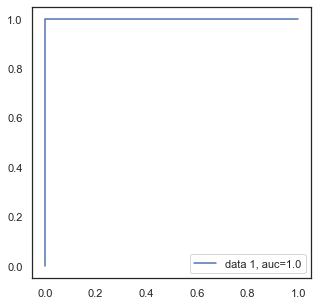

In [58]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  yhat)
auc = metrics.roc_auc_score(y_test, yhat)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


## 8. Summary

From the above analysis, we infer that for <b>Quantitative Dataset</b>, Regression Model given 100% accuracy in analysis.
In Ensemble Blending, it produced 100% accuracy.
From these model, Banking sector can easily classify bankruptcy from the factors.